# Task 3 Background

Today, credit is no longer limited to classical bank loans. The rise of e-commerce has increased the demand for new and more flexible credit solutions. The increased demand has been met by new companies from the fintech sector that offer easily accessible online loans to a wide audience. These new business models offer simple solutions, such as flexible payment schedules or buy-now-pay-later, that can be accessed with just a few clicks. 

Online merchants also need new ways to procure capital to manufacture their products, as they receive payment only after their product has been sold. In order to meet increasing demand, new credit offerings have emerged. Repayment of these loans is no longer based on a fixed schedule but instead depends directly on online sales. The loan is paid back in instalments with every sale, and thus payments depend directly on the sales volume. 

Predicting the future cash flows needed for the valuation of a portfolio consisting of these merchant loans is challenging. 

But you’re up for a challenge, right? 

Next stop: Zurich.

Our client is a large global online lending platform that provides loans to both consumers and merchants. These instruments are classified as assets on the balance sheet. 

Our audit colleagues have asked for our help to ensure the balance sheet values are correct. The value of the loan portfolio depends on future cash flows, which are stochastic. 

Our job is to ensure that the client’s portfolio has been valued correctly.

# Task and to-do

As you are supporting the audit colleagues with the audit for the year 2020, the value of the portfolio shall be determined as of 31 December 2020. For the valuation, you are free to use a tool of your choice (e.g. R, Python, Excel). The following steps will guide you through the valuation:

1. Inspect the historical data provided by the client. The data ranges from June 2019 until December 2020. Every month constitutes a vintage and the data includes the loan amount that was originated per vintage, as well as the repayments that have been observed up until and including December 2020 (the vintages are given as rows and the columns specify the period of the repayment).
2. Based on the provided data, compute the historical repayment percentages, i.e. every repayment’s share of the origination amount.
3. Compute the expected repayment percentages for all vintages over the lifetime of the loans. Details on how the expected repayment percentages are to be computed can be found in the attached assumptions PDF below.
4. From the expected repayment percentages, compute the forecasted cash flows using the origination amounts.
5. Using the assumed discount rate, derive the present value of the forecasted cash flows and of the portfolio. Don’t forget to convert the annual interest rate to a monthly interest rate.
6. The client’s estimate of the portfolio value was CHF 84’993’122.67. How close is this to your own estimate? Compute both the absolute and relative difference. Jakob tells you that the audit team considers any difference smaller than CHF 500’000 to be acceptable given the size of the portfolio. 
7. Based on the result of your valuation, conclude whether the difference to the client’s estimate falls below his threshold. 

Jakob notes: The portfolio value should be rounded to two decimal places. The slides can be simple as we'll use them internally first. Focus on correct solutions to set up the team with the right insights. 

# Task 1

In [291]:
import pandas as pd
from pathlib import Path

data = pd.read_csv(Path("Data.csv"), sep=';', header=[0], index_col=[0])

In [292]:
data #Data is the 

,Origination Amount,31.05.2019,30.06.2019,31.07.2019,31.08.2019,30.09.2019,31.10.2019,30.11.2019,31.12.2019,31.01.2020,...,31.03.2020,30.04.2020,31.05.2020,30.06.2020,31.07.2020,31.08.2020,30.09.2020,31.10.2020,30.11.2020,31.12.2020
31.05.2019,10018746.17,1443069.08,3332200.33,1328138.75,928085.74,736418.27,539403.31,427557.86,324459.32,237056.39,...,116684.68,92699.67,63399.66,53265.12,37121.13,29787.10,24524.90,18085.94,16581.01,11442.97
30.06.2019,10868379.04,0.00,1392751.60,3011884.91,1237868.70,970929.28,892351.83,668767.02,505612.59,419598.74,...,255222.42,198833.96,161996.73,138461.91,92346.68,79641.30,63457.44,52373.85,43374.70,37404.87
31.07.2019,10733932.61,0.00,0.00,1537650.24,2953335.55,1208316.08,879375.19,711016.84,658251.40,503465.03,...,302575.54,258652.52,191798.05,170027.54,127574.33,110301.21,89766.69,64746.84,61408.92,50312.70
31.08.2019,12558727.02,0.00,0.00,0.00,1617681.94,4082016.00,1387474.94,1247623.59,886293.35,694348.63,...,417223.56,336686.08,253556.20,200066.59,151859.74,109973.00,90228.14,70661.50,53102.83,47069.84
30.09.2019,14505071.44,0.00,0.00,0.00,0.00,1992242.84,3930445.60,1394620.78,1227905.58,939424.54,...,628429.48,589692.85,457299.31,323764.87,288152.28,239872.99,192246.98,171550.69,142575.97,116853.05
31.10.2019,15652952.20,0.00,0.00,0.00,0.00,0.00,2289453.76,4682354.31,1659503.89,1165897.09,...,763523.36,742787.97,558085.95,461806.22,358671.23,281881.11,241719.91,182730.05,144953.58,119260.10
30.11.2019,15107713.30,0.00,0.00,0.00,0.00,0.00,0.00,2162283.09,4637701.69,1576348.23,...,930720.35,697500.94,667277.73,547749.09,387987.02,309448.86,283876.04,215635.85,185516.45,141560.57
31.12.2019,17004745.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2402403.37,4947764.21,...,1245452.39,1116505.94,803590.21,724956.28,545397.33,458832.95,393971.01,333818.53,286831.44,216447.57
31.01.2020,16794379.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2502066.86,...,1505493.21,1182983.95,955821.48,846061.73,683116.81,560572.44,468203.76,349067.92,309854.99,267813.78
29.02.2020,19217205.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,6142911.08,1833677.81,1317065.75,1108494.37,918465.33,719913.69,587381.96,498801.31,371563.77,294941.22


In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 31.05.2019 to 31.12.2020
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Origination Amount  20 non-null     float64
 1   31.05.2019          20 non-null     float64
 2   30.06.2019          20 non-null     float64
 3   31.07.2019          20 non-null     float64
 4   31.08.2019          20 non-null     float64
 5   30.09.2019          20 non-null     float64
 6   31.10.2019          20 non-null     float64
 7   30.11.2019          20 non-null     float64
 8   31.12.2019          20 non-null     float64
 9   31.01.2020          20 non-null     float64
 10  29.02.2020          20 non-null     float64
 11  31.03.2020          20 non-null     float64
 12  30.04.2020          20 non-null     float64
 13  31.05.2020          20 non-null     float64
 14  30.06.2020          20 non-null     float64
 15  31.07.2020          20 non-null     float64
 16

In [294]:
data.describe()

,Origination Amount,31.05.2019,30.06.2019,31.07.2019,31.08.2019,30.09.2019,31.10.2019,30.11.2019,31.12.2019,31.01.2020,...,31.03.2020,30.04.2020,31.05.2020,30.06.2020,31.07.2020,31.08.2020,30.09.2020,31.10.2020,30.11.2020,31.12.2020
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,...,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,1.993947e+07,7.215345e+04,2.362476e+05,2.938837e+05,3.368486e+05,4.494961e+05,4.959252e+05,5.647112e+05,6.151066e+05,6.492985e+05,...,7.575761e+05,8.305650e+05,8.533581e+05,9.565448e+05,1.005886e+06,9.749524e+05,1.044697e+06,9.591175e+05,1.078137e+06,1.057797e+06
std,6.563824e+06,3.226801e+05,7.923004e+05,7.770531e+05,7.767479e+05,1.014007e+06,1.014547e+06,1.143841e+06,1.159722e+06,1.214030e+06,...,1.457239e+06,1.517052e+06,1.573937e+06,1.811136e+06,2.054033e+06,1.860876e+06,1.959497e+06,1.672878e+06,2.055731e+06,1.978896e+06
min,1.001875e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.144297e+04
25%,1.495705e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.784085e+04,6.717775e+04,8.318938e+04,6.918283e+04,1.222842e+05,1.186583e+05
50%,2.042265e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.859535e+05,2.287432e+05,2.226771e+05,2.619157e+05,3.234118e+05,2.956650e+05,3.389235e+05,3.414432e+05,3.407094e+05,4.033075e+05
75%,2.557838e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.841046e+05,6.243963e+05,6.793295e+05,7.152619e+05,7.556176e+05,...,8.053226e+05,8.362175e+05,8.416480e+05,9.116699e+05,9.665936e+05,9.852002e+05,1.030446e+06,9.565251e+05,1.003413e+06,9.841216e+05
max,3.048298e+07,1.443069e+06,3.332200e+06,3.011885e+06,2.953336e+06,4.082016e+06,3.930446e+06,4.682354e+06,4.637702e+06,4.947764e+06,...,6.142911e+06,6.228478e+06,6.476252e+06,7.636996e+06,8.983764e+06,8.030091e+06,8.374135e+06,7.065477e+06,8.752707e+06,8.383025e+06


# Task 2

In [295]:
loans = data.copy()

In [296]:
import numpy as np

column_names = np.array(loans.columns)[1:]
origination = loans["Origination Amount"]

for col in column_names:
    loans[col] = (loans[col] / origination)

In [297]:
loans

,Origination Amount,31.05.2019,30.06.2019,31.07.2019,31.08.2019,30.09.2019,31.10.2019,30.11.2019,31.12.2019,31.01.2020,...,31.03.2020,30.04.2020,31.05.2020,30.06.2020,31.07.2020,31.08.2020,30.09.2020,31.10.2020,30.11.2020,31.12.2020
31.05.2019,10018746.17,0.144037,0.332597,0.132565,0.092635,0.073504,0.053839,0.042676,0.032385,0.023661,...,0.011647,0.009253,0.006328,0.005317,0.003705,0.002973,0.002448,0.001805,0.001655,0.001142
30.06.2019,10868379.04,0.000000,0.128147,0.277124,0.113896,0.089335,0.082105,0.061533,0.046521,0.038607,...,0.023483,0.018295,0.014905,0.012740,0.008497,0.007328,0.005839,0.004819,0.003991,0.003442
31.07.2019,10733932.61,0.000000,0.000000,0.143251,0.275140,0.112570,0.081925,0.066240,0.061324,0.046904,...,0.028189,0.024097,0.017868,0.015840,0.011885,0.010276,0.008363,0.006032,0.005721,0.004687
31.08.2019,12558727.02,0.000000,0.000000,0.000000,0.128809,0.325034,0.110479,0.099343,0.070572,0.055288,...,0.033222,0.026809,0.020190,0.015930,0.012092,0.008757,0.007184,0.005626,0.004228,0.003748
30.09.2019,14505071.44,0.000000,0.000000,0.000000,0.000000,0.137348,0.270970,0.096147,0.084654,0.064765,...,0.043325,0.040654,0.031527,0.022321,0.019866,0.016537,0.013254,0.011827,0.009829,0.008056
31.10.2019,15652952.20,0.000000,0.000000,0.000000,0.000000,0.000000,0.146263,0.299136,0.106019,0.074484,...,0.048778,0.047454,0.035654,0.029503,0.022914,0.018008,0.015442,0.011674,0.009260,0.007619
30.11.2019,15107713.30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143124,0.306976,0.104341,...,0.061606,0.046169,0.044168,0.036256,0.025681,0.020483,0.018790,0.014273,0.012280,0.009370
31.12.2019,17004745.04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141278,0.290964,...,0.073241,0.065658,0.047257,0.042633,0.032073,0.026983,0.023168,0.019631,0.016868,0.012729
31.01.2020,16794379.95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148982,...,0.089643,0.070439,0.056913,0.050378,0.040675,0.033379,0.027879,0.020785,0.018450,0.015947
29.02.2020,19217205.82,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.319657,0.095419,0.068536,0.057682,0.047794,0.037462,0.030565,0.025956,0.019335,0.015348


In [298]:
names = [f"month_{i}" for i in range(len(loans.columns) - 1)]

In [299]:
loans = loans.set_axis(names, axis=0)

In [300]:
col_names = ["Origination"] + names

In [301]:
loans = loans.set_axis(col_names, axis=1)

In [302]:
loans

,Origination,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,...,month_10,month_11,month_12,month_13,month_14,month_15,month_16,month_17,month_18,month_19
month_0,10018746.17,0.144037,0.332597,0.132565,0.092635,0.073504,0.053839,0.042676,0.032385,0.023661,...,0.011647,0.009253,0.006328,0.005317,0.003705,0.002973,0.002448,0.001805,0.001655,0.001142
month_1,10868379.04,0.000000,0.128147,0.277124,0.113896,0.089335,0.082105,0.061533,0.046521,0.038607,...,0.023483,0.018295,0.014905,0.012740,0.008497,0.007328,0.005839,0.004819,0.003991,0.003442
month_2,10733932.61,0.000000,0.000000,0.143251,0.275140,0.112570,0.081925,0.066240,0.061324,0.046904,...,0.028189,0.024097,0.017868,0.015840,0.011885,0.010276,0.008363,0.006032,0.005721,0.004687
month_3,12558727.02,0.000000,0.000000,0.000000,0.128809,0.325034,0.110479,0.099343,0.070572,0.055288,...,0.033222,0.026809,0.020190,0.015930,0.012092,0.008757,0.007184,0.005626,0.004228,0.003748
month_4,14505071.44,0.000000,0.000000,0.000000,0.000000,0.137348,0.270970,0.096147,0.084654,0.064765,...,0.043325,0.040654,0.031527,0.022321,0.019866,0.016537,0.013254,0.011827,0.009829,0.008056
month_5,15652952.20,0.000000,0.000000,0.000000,0.000000,0.000000,0.146263,0.299136,0.106019,0.074484,...,0.048778,0.047454,0.035654,0.029503,0.022914,0.018008,0.015442,0.011674,0.009260,0.007619
month_6,15107713.30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143124,0.306976,0.104341,...,0.061606,0.046169,0.044168,0.036256,0.025681,0.020483,0.018790,0.014273,0.012280,0.009370
month_7,17004745.04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141278,0.290964,...,0.073241,0.065658,0.047257,0.042633,0.032073,0.026983,0.023168,0.019631,0.016868,0.012729
month_8,16794379.95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148982,...,0.089643,0.070439,0.056913,0.050378,0.040675,0.033379,0.027879,0.020785,0.018450,0.015947
month_9,19217205.82,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.319657,0.095419,0.068536,0.057682,0.047794,0.037462,0.030565,0.025956,0.019335,0.015348


# Task 3

### Assumptions
- Cash flows are assumed to be paid back by 30 months which is the total lifetime

In [303]:
# Task 3
months = {f"month_{i}": float(0.000000) for i in range(20, 44)}
loans = loans.assign(**months)

In [304]:
loans

,Origination,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,...,month_34,month_35,month_36,month_37,month_38,month_39,month_40,month_41,month_42,month_43
month_0,10018746.17,0.144037,0.332597,0.132565,0.092635,0.073504,0.053839,0.042676,0.032385,0.023661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
month_1,10868379.04,0.000000,0.128147,0.277124,0.113896,0.089335,0.082105,0.061533,0.046521,0.038607,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
month_2,10733932.61,0.000000,0.000000,0.143251,0.275140,0.112570,0.081925,0.066240,0.061324,0.046904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
month_3,12558727.02,0.000000,0.000000,0.000000,0.128809,0.325034,0.110479,0.099343,0.070572,0.055288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
month_4,14505071.44,0.000000,0.000000,0.000000,0.000000,0.137348,0.270970,0.096147,0.084654,0.064765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
month_5,15652952.20,0.000000,0.000000,0.000000,0.000000,0.000000,0.146263,0.299136,0.106019,0.074484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
month_6,15107713.30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143124,0.306976,0.104341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
month_7,17004745.04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141278,0.290964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
month_8,16794379.95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
month_9,19217205.82,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [305]:
loans = loans.drop("month_0", axis=1)
loans = loans.drop("month_0", axis=0)

In [306]:
loans

,Origination,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,month_34,month_35,month_36,month_37,month_38,month_39,month_40,month_41,month_42,month_43
month_1,10868379.04,0.128147,0.277124,0.113896,0.089335,0.082105,0.061533,0.046521,0.038607,0.030295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
month_2,10733932.61,0.000000,0.143251,0.275140,0.112570,0.081925,0.066240,0.061324,0.046904,0.039412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
month_3,12558727.02,0.000000,0.000000,0.128809,0.325034,0.110479,0.099343,0.070572,0.055288,0.045468,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
month_4,14505071.44,0.000000,0.000000,0.000000,0.137348,0.270970,0.096147,0.084654,0.064765,0.055351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
month_5,15652952.20,0.000000,0.000000,0.000000,0.000000,0.146263,0.299136,0.106019,0.074484,0.062535,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
month_6,15107713.30,0.000000,0.000000,0.000000,0.000000,0.000000,0.143124,0.306976,0.104341,0.075760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
month_7,17004745.04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141278,0.290964,0.089572,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
month_8,16794379.95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148982,0.279672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
month_9,19217205.82,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
month_10,21628095.29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [307]:
def p_i(i, p2, previous_sum):
    return max(p2 * np.log(1 + (1 -  (i - 1) / 30) * (1 - previous_sum)), 0)

In [308]:
def calcs(df, row_number):
    row = df.loc[f"month_{row_number}"][1:]
    historical_data = row[:19].tolist() 
    non_zero = [i for i in historical_data if i != 0]

    p1 = non_zero[0]
    if len(non_zero) == 1:
        p2 = p1 * 2
        non_zero.append(p2)
    else:
        p2 = non_zero[1]
    
    results = non_zero.copy()
    previous_sum = sum(results)
    
    start_predict = len(results) + 1
    total_months = min(30, 44 - row_number) 

    for i in range(start_predict, total_months + 1):
        p = p_i(i, p2, previous_sum)
        print(sum(results), i - 1)
        results.append(p)
        previous_sum = sum(results)
    return results

In [309]:
def new_rows(array, i):
    start_column = loans.columns.get_loc(f"month_{i}")
    end_column = start_column + len(array)
    print(start_column)
    loans.loc[f"month_{i}", loans.columns[start_column:end_column]] = array

In [310]:
for i in range(1, 20):
    l = calcs(loans, i)
    new_rows(l, i)

0.970902945247298 19
0.9738438947314468 20
0.9762495811600141 21
0.9782171208249041 22
0.9798222104795614 23
0.9811238886064526 24
0.9821681221291428 25
0.9829905065368639 26
0.9836182926476738 27
0.984071897067917 28
0.9843660112116591 29
1
0.9597246670249032 18
0.9641218855264705 19
0.9677178373716184 20
0.970662727144694 21
0.9730736912407166 22
0.9750422343702473 23
0.976639859641231 24
0.977922328486657 25
0.9789328792872461 26
0.9797046505549641 27
0.9802624911641655 28
0.9806242918901519 29
2
0.97278094750721 17
0.9765922677966916 18
0.9796214342012537 19
0.9820411067802735 20
0.9839810575916905 21
0.9855393276273106 22
0.9867903073915021 23
0.9877906070772634 24
0.9885833336926785 25
0.9892012138997128 26
0.9896688739672698 27
0.9900044975744094 28
0.9902210174616947 29
3
0.9264310800250701 16
0.9355779487303603 17
0.9430387588310901 18
0.9491433994258559 19
0.9541497649305283 20
0.9582597895290569 21
0.9616318298339042 22
0.9643901800550613 23
0.9666323598200569 24
0.968434681

In [311]:
loans

,Origination,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,month_34,month_35,month_36,month_37,month_38,month_39,month_40,month_41,month_42,month_43
month_1,10868379.04,0.128147,0.277124,0.113896,0.089335,0.082105,0.061533,0.046521,0.038607,0.030295,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_2,10733932.61,0.000000,0.143251,0.275140,0.112570,0.081925,0.066240,0.061324,0.046904,0.039412,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_3,12558727.02,0.000000,0.000000,0.128809,0.325034,0.110479,0.099343,0.070572,0.055288,0.045468,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_4,14505071.44,0.000000,0.000000,0.000000,0.137348,0.270970,0.096147,0.084654,0.064765,0.055351,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_5,15652952.20,0.000000,0.000000,0.000000,0.000000,0.146263,0.299136,0.106019,0.074484,0.062535,...,0.000188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_6,15107713.30,0.000000,0.000000,0.000000,0.000000,0.000000,0.143124,0.306976,0.104341,0.075760,...,0.000395,0.000193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_7,17004745.04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141278,0.290964,0.089572,...,0.000770,0.000499,0.000245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_8,16794379.95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148982,0.279672,...,0.001140,0.000823,0.000534,0.000262,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_9,19217205.82,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147462,...,0.000988,0.000749,0.000538,0.000347,0.000170,0.000000,0.000000,0.000000,0.000000,0.000000
month_10,21628095.29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001923,0.001512,0.001152,0.000831,0.000539,0.000264,0.000000,0.000000,0.000000,0.000000


# Task 4

In [312]:
cashflow = loans.copy()

In [313]:
column_names = np.array(cashflow.columns)[1:]
origination = loans["Origination"]

In [314]:
for col in column_names:
    cashflow[col] = loans[col] * origination

In [315]:
cashflow

,Origination,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,month_34,month_35,month_36,month_37,month_38,month_39,month_40,month_41,month_42,month_43
month_1,10868379.04,1392751.6,3011884.91,1237868.70,970929.28,892351.83,668767.02,505612.59,419598.74,329262.69,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_2,10733932.61,0.0,1537650.24,2953335.55,1208316.08,879375.19,711016.84,658251.40,503465.03,423045.23,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_3,12558727.02,0.0,0.00,1617681.94,4082016.00,1387474.94,1247623.59,886293.35,694348.63,571024.44,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_4,14505071.44,0.0,0.00,0.00,1992242.84,3930445.60,1394620.78,1227905.58,939424.54,802871.19,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_5,15652952.20,0.0,0.00,0.00,0.00,2289453.76,4682354.31,1659503.89,1165897.09,978861.35,...,2937.206531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_6,15107713.30,0.0,0.00,0.00,0.00,0.00,2162283.09,4637701.69,1576348.23,1144559.96,...,5960.513871,2920.262199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_7,17004745.04,0.0,0.00,0.00,0.00,0.00,0.00,2402403.37,4947764.21,1523145.18,...,13093.492116,8479.302893,4159.298685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_8,16794379.95,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2502066.86,4696910.48,...,19140.657058,13829.094810,8966.577668,4401.917678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_9,19217205.82,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2833811.35,...,18992.067059,14390.836137,10337.064168,6673.264083,3266.471280,0.000000,0.000000,0.000000,0.000000,0.000000
month_10,21628095.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,41590.648851,32692.680077,24917.679632,17982.127343,11649.272186,5715.637569,0.000000,0.000000,0.000000,0.000000


# Task 5

- Using the assumed discount rate, derive the present value of the forecasted cash flows and of the portfolio. Don’t forget to convert the annual interest rate to a monthly interest rate.

In [316]:
present_value = cashflow.copy()

In [317]:
annual_rate = 0.025
monthly_rate = ((1 + annual_rate) ** (1 / 12)) - 1

In [318]:
predicted = np.array(present_value.columns)[20:]

In [319]:
predicted

array(['month_20', 'month_21', 'month_22', 'month_23', 'month_24',
       'month_25', 'month_26', 'month_27', 'month_28', 'month_29',
       'month_30', 'month_31', 'month_32', 'month_33', 'month_34',
       'month_35', 'month_36', 'month_37', 'month_38', 'month_39',
       'month_40', 'month_41', 'month_42', 'month_43'], dtype=object)

In [320]:
len(predicted)

24

In [321]:
for i in range(len(predicted)):
    present_value[predicted[i]] = cashflow[predicted[i]] / (monthly_rate + 1) ** (i + 1)

In [322]:
cashflow

,Origination,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,month_34,month_35,month_36,month_37,month_38,month_39,month_40,month_41,month_42,month_43
month_1,10868379.04,1392751.6,3011884.91,1237868.70,970929.28,892351.83,668767.02,505612.59,419598.74,329262.69,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_2,10733932.61,0.0,1537650.24,2953335.55,1208316.08,879375.19,711016.84,658251.40,503465.03,423045.23,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_3,12558727.02,0.0,0.00,1617681.94,4082016.00,1387474.94,1247623.59,886293.35,694348.63,571024.44,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_4,14505071.44,0.0,0.00,0.00,1992242.84,3930445.60,1394620.78,1227905.58,939424.54,802871.19,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_5,15652952.20,0.0,0.00,0.00,0.00,2289453.76,4682354.31,1659503.89,1165897.09,978861.35,...,2937.206531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_6,15107713.30,0.0,0.00,0.00,0.00,0.00,2162283.09,4637701.69,1576348.23,1144559.96,...,5960.513871,2920.262199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_7,17004745.04,0.0,0.00,0.00,0.00,0.00,0.00,2402403.37,4947764.21,1523145.18,...,13093.492116,8479.302893,4159.298685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_8,16794379.95,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2502066.86,4696910.48,...,19140.657058,13829.094810,8966.577668,4401.917678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_9,19217205.82,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2833811.35,...,18992.067059,14390.836137,10337.064168,6673.264083,3266.471280,0.000000,0.000000,0.000000,0.000000,0.000000
month_10,21628095.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,41590.648851,32692.680077,24917.679632,17982.127343,11649.272186,5715.637569,0.000000,0.000000,0.000000,0.000000


In [323]:
present_value

,Origination,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,month_34,month_35,month_36,month_37,month_38,month_39,month_40,month_41,month_42,month_43
month_1,10868379.04,1392751.6,3011884.91,1237868.70,970929.28,892351.83,668767.02,505612.59,419598.74,329262.69,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_2,10733932.61,0.0,1537650.24,2953335.55,1208316.08,879375.19,711016.84,658251.40,503465.03,423045.23,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_3,12558727.02,0.0,0.00,1617681.94,4082016.00,1387474.94,1247623.59,886293.35,694348.63,571024.44,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_4,14505071.44,0.0,0.00,0.00,1992242.84,3930445.60,1394620.78,1227905.58,939424.54,802871.19,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_5,15652952.20,0.0,0.00,0.00,0.00,2289453.76,4682354.31,1659503.89,1165897.09,978861.35,...,2847.932250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_6,15107713.30,0.0,0.00,0.00,0.00,0.00,2162283.09,4637701.69,1576348.23,1144559.96,...,5779.348335,2825.682485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_7,17004745.04,0.0,0.00,0.00,0.00,0.00,0.00,2402403.37,4947764.21,1523145.18,...,12695.524833,8204.680278,4016.316839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_8,16794379.95,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2502066.86,4696910.48,...,18558.890542,13381.206317,8658.338726,4241.857924,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_9,19217205.82,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2833811.35,...,18414.816829,13924.754301,9981.712791,6430.615064,3141.227498,0.000000,0.000000,0.000000,0.000000,0.000000
month_10,21628095.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,40326.530969,31633.849011,24061.098729,17328.272573,11202.613151,5485.188707,0.000000,0.000000,0.000000,0.000000


# Task 6
- The client’s estimate of the portfolio value was CHF 84’993’122.67. How close is this to your own estimate? Compute both the absolute and relative difference. Jakob tells you that the audit team considers any difference smaller than CHF 500’000 to be acceptable given the size of the portfolio. 

In [324]:
present_value['PV'] = present_value.loc[:, 'month_20':'month_43'].sum(axis=1)
total_pv = present_value['PV'].sum()

In [325]:
total_pv

113403325.45002894

In [326]:
present_value.loc[:, 'month_20':'month_43']

,month_20,month_21,month_22,month_23,month_24,month_25,month_26,month_27,month_28,month_29,...,month_34,month_35,month_36,month_37,month_38,month_39,month_40,month_41,month_42,month_43
month_1,3.189765e+04,2.603853e+04,2.125237e+04,1.730173e+04,1.400232e+04,1.120987e+04,8.810165e+03,6711.618087,4839.485079,3131.440266,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_2,4.710242e+04,3.844018e+04,3.141571e+04,2.566699e+04,2.091392e+04,1.693838e+04,1.356907e+04,10670.082350,8132.134847,5865.870033,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_3,4.776694e+04,3.788623e+04,3.020100e+04,2.416360e+04,1.936957e+04,1.551794e+04,1.238284e+04,9793.091599,7617.404268,5753.595872,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_4,1.324033e+05,1.077751e+05,8.800331e+04,7.202244e+04,5.900598e+04,4.831152e+04,3.943789e+04,31991.975416,25663.108215,20203.391114,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_5,1.500293e+05,1.195606e+05,9.576645e+04,7.705397e+04,6.222192e+04,5.036303e+04,4.078964e+04,32977.864712,26525.897325,21122.927822,...,2847.932250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_6,1.950844e+05,1.539412e+05,1.221586e+05,9.745702e+04,7.812246e+04,6.286805e+04,5.072622e+04,40967.058800,33037.127936,26513.964332,...,5779.348335,2825.682485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_7,3.194471e+05,2.538346e+05,2.026192e+05,1.624888e+05,1.308831e+05,1.058365e+05,8.584522e+04,69758.990984,56696.313142,45978.998265,...,12695.524833,8204.680278,4016.316839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_8,3.958267e+05,3.157691e+05,2.528473e+05,2.032954e+05,1.641347e+05,1.330377e+05,1.081993e+05,88224.142346,72034.627618,58797.271910,...,18558.890542,13381.206317,8658.338726,4241.857924,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
month_9,5.021614e+05,3.861777e+05,2.984823e+05,2.320556e+05,1.815422e+05,1.429187e+05,1.131889e+05,90129.488336,72092.027784,57851.259202,...,18414.816829,13924.754301,9981.712791,6430.615064,3141.227498,0.000000,0.000000,0.000000,0.000000,0.000000
month_10,8.612109e+05,6.802797e+05,5.383384e+05,4.273062e+05,3.404777e+05,2.724545e+05,2.189790e+05,176737.527450,143171.548243,116313.727583,...,40326.530969,31633.849011,24061.098729,17328.272573,11202.613151,5485.188707,0.000000,0.000000,0.000000,0.000000


In [327]:
present_value

,Origination,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,month_35,month_36,month_37,month_38,month_39,month_40,month_41,month_42,month_43,PV
month_1,10868379.04,1392751.6,3011884.91,1237868.70,970929.28,892351.83,668767.02,505612.59,419598.74,329262.69,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.467292e+05
month_2,10733932.61,0.0,1537650.24,2953335.55,1208316.08,879375.19,711016.84,658251.40,503465.03,423045.23,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.243717e+05
month_3,12558727.02,0.0,0.00,1617681.94,4082016.00,1387474.94,1247623.59,886293.35,694348.63,571024.44,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.185210e+05
month_4,14505071.44,0.0,0.00,0.00,1992242.84,3930445.60,1394620.78,1227905.58,939424.54,802871.19,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.620938e+05
month_5,15652952.20,0.0,0.00,0.00,0.00,2289453.76,4682354.31,1659503.89,1165897.09,978861.35,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.231667e+05
month_6,15107713.30,0.0,0.00,0.00,0.00,0.00,2162283.09,4637701.69,1576348.23,1144559.96,...,2825.682485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.284458e+05
month_7,17004745.04,0.0,0.00,0.00,0.00,0.00,0.00,2402403.37,4947764.21,1523145.18,...,8204.680278,4016.316839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.565822e+06
month_8,16794379.95,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2502066.86,4696910.48,...,13381.206317,8658.338726,4241.857924,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.978974e+06
month_9,19217205.82,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2833811.35,...,13924.754301,9981.712791,6430.615064,3141.227498,0.000000,0.000000,0.000000,0.000000,0.000000,2.265804e+06
month_10,21628095.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,31633.849011,24061.098729,17328.272573,11202.613151,5485.188707,0.000000,0.000000,0.000000,0.000000,4.190003e+06


In [328]:
abs_diff = abs(total_pv - 84993122.67)
abs_diff

28410202.78002894

In [329]:
rel_diff = ((total_pv - 84993122.67) / 84993122.67) * 100
print(f"Percentage Difference = {rel_diff.round(2)}%")

Percentage Difference = 33.43%


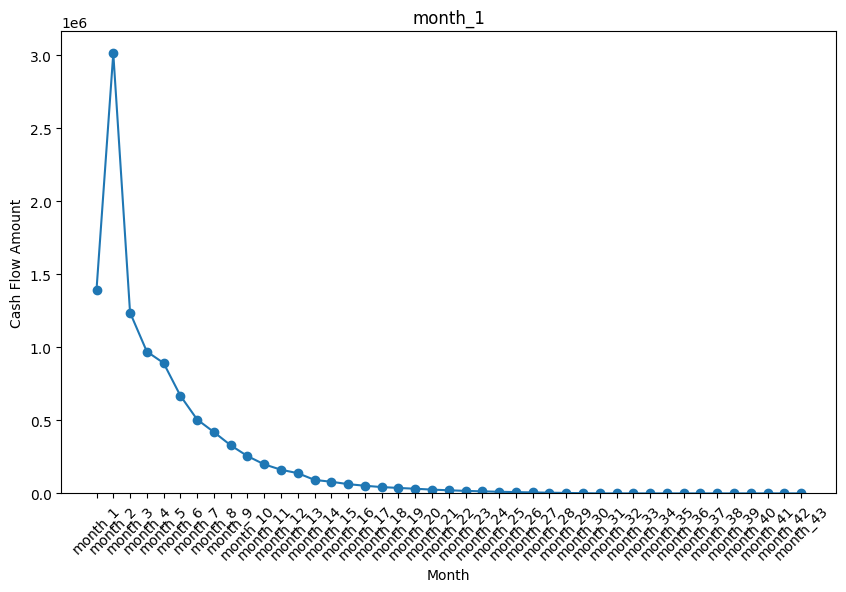

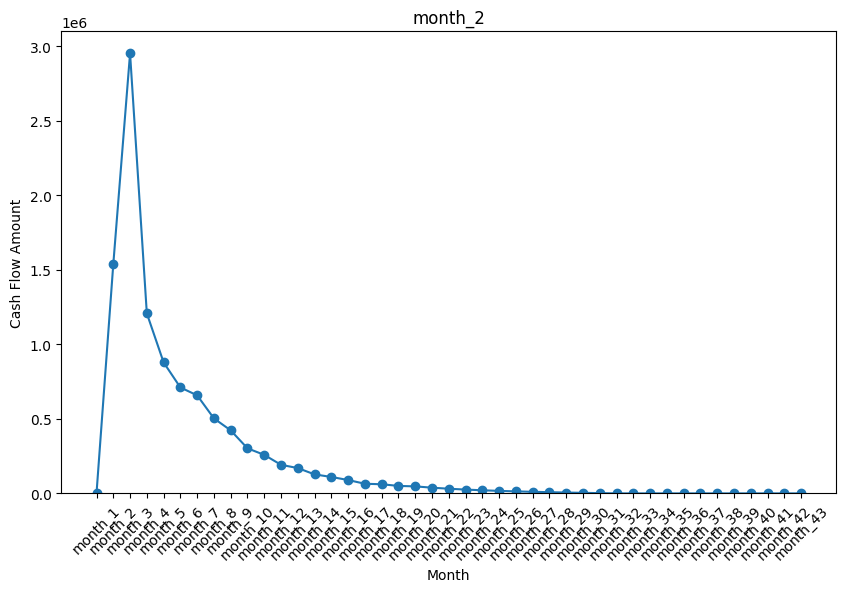

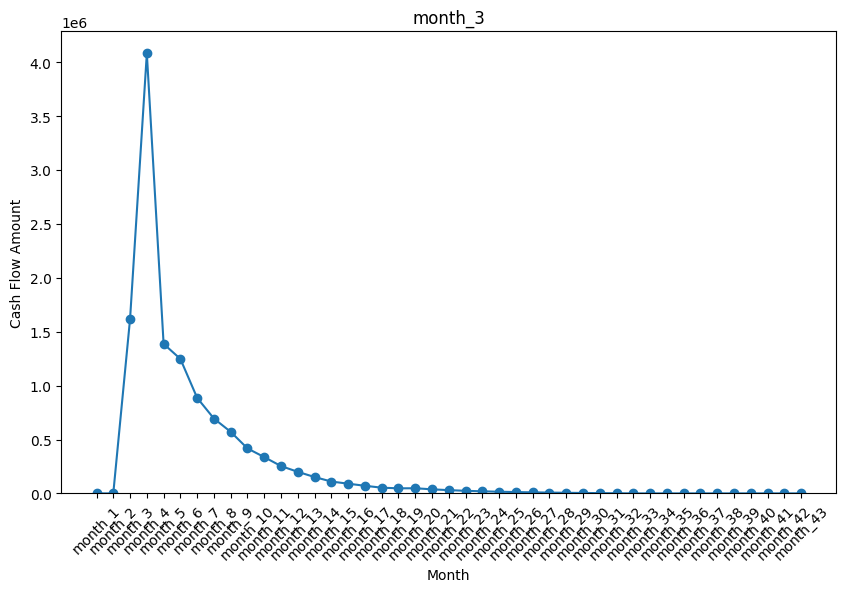

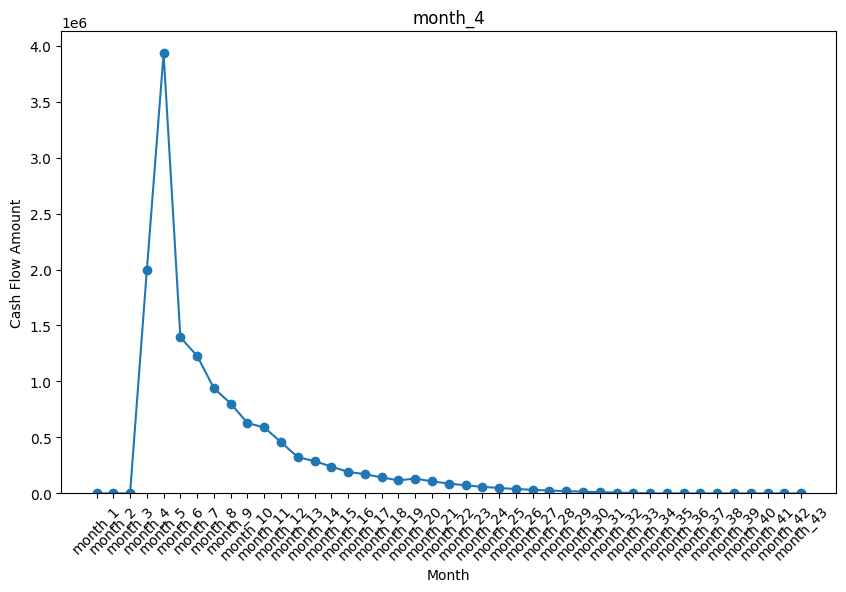

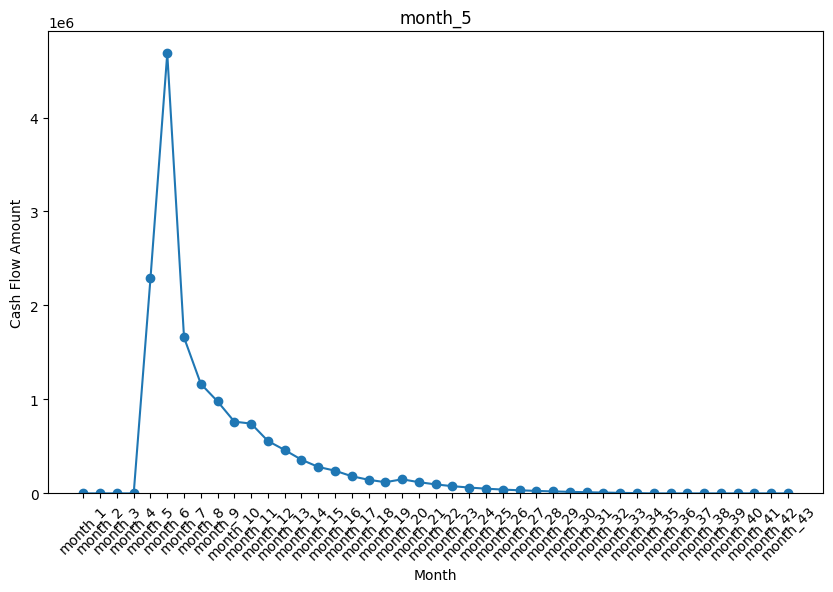

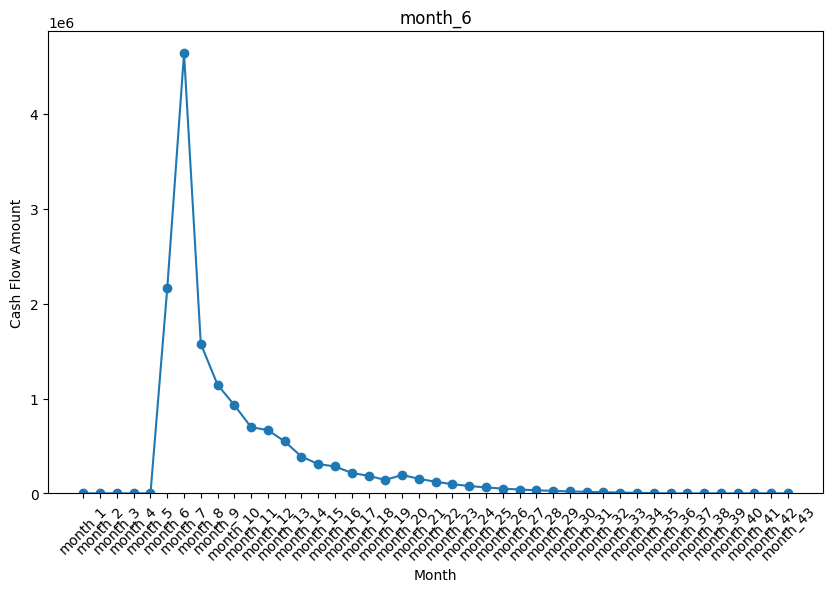

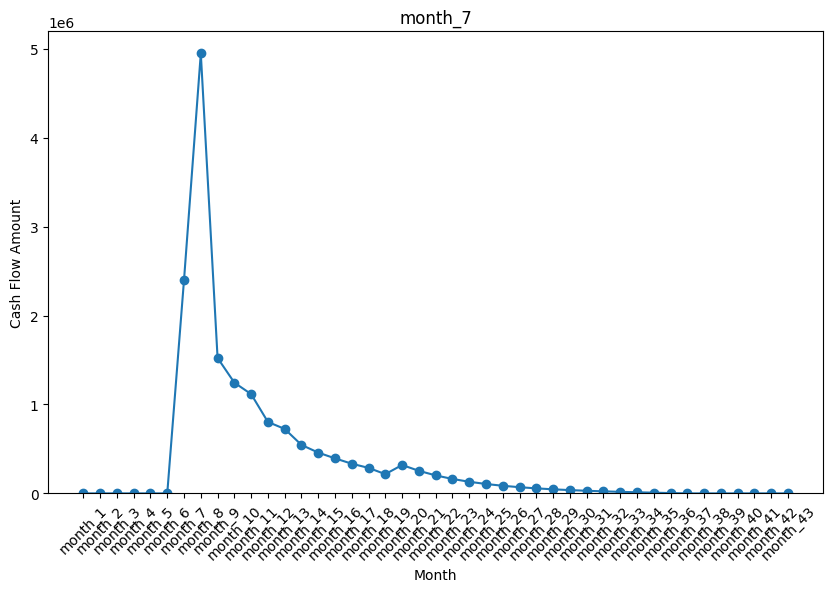

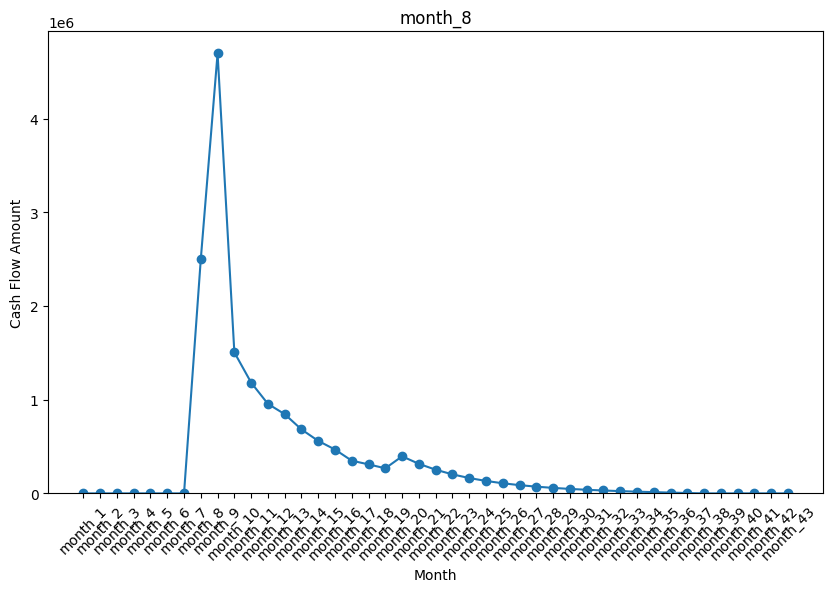

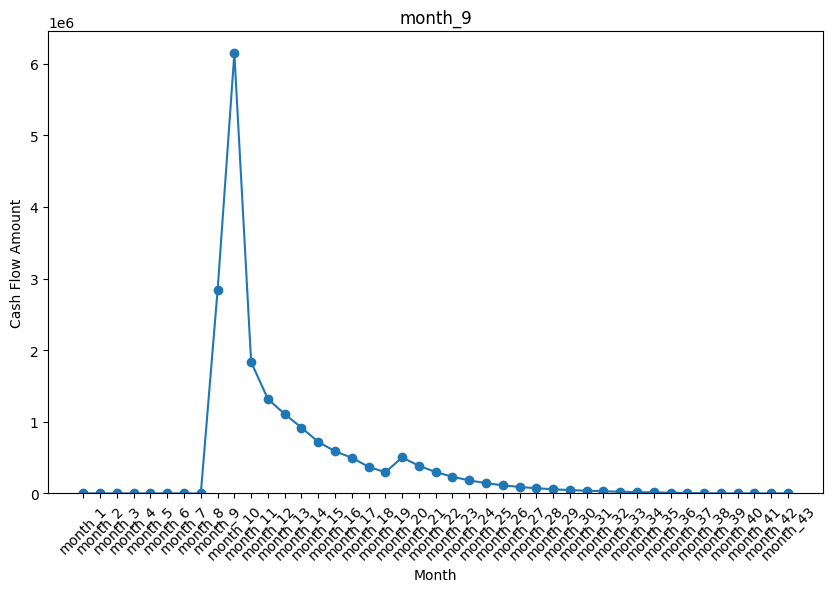

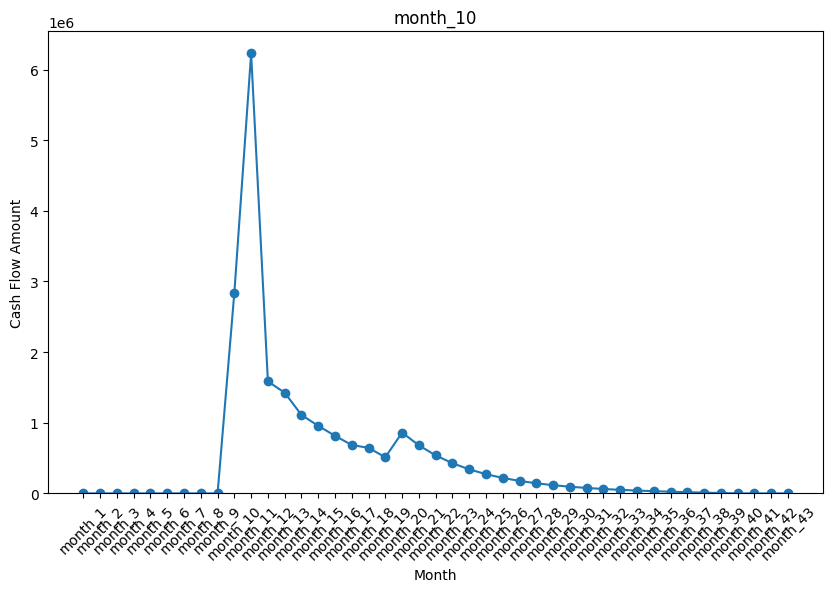

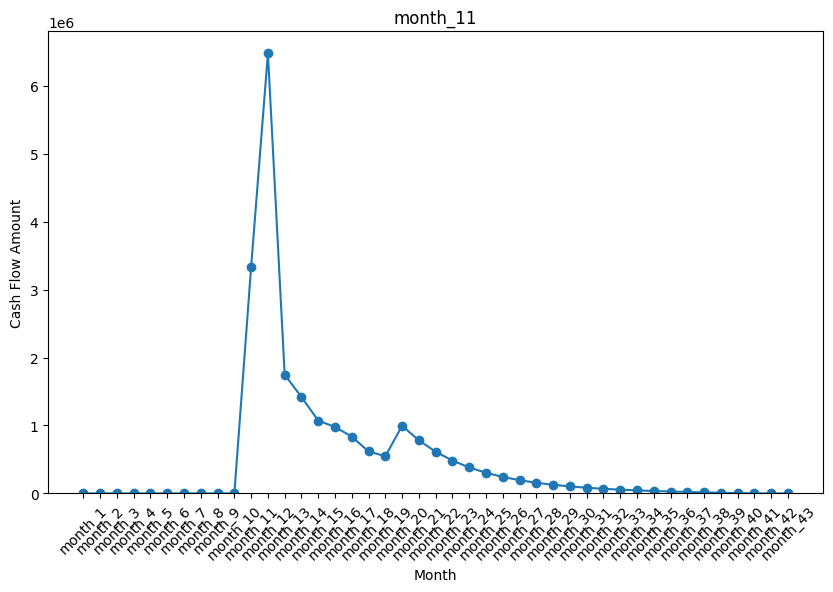

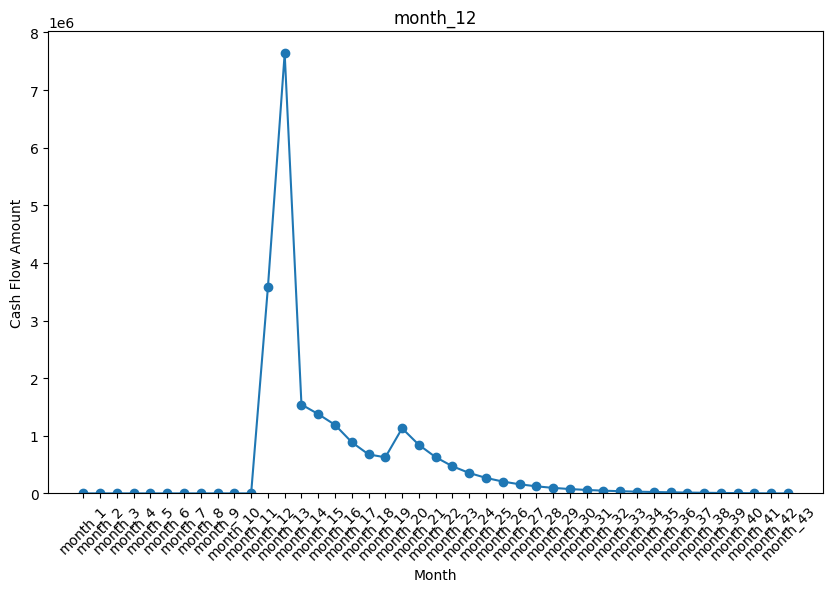

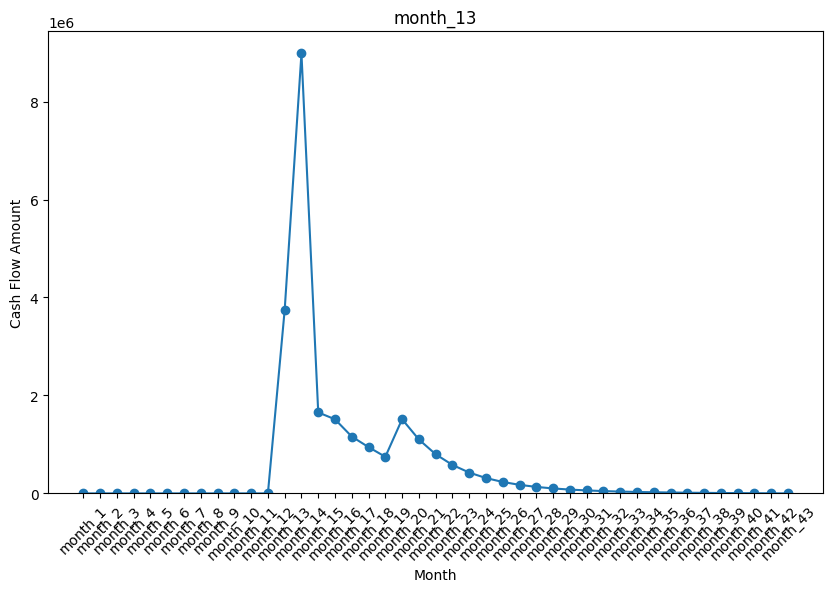

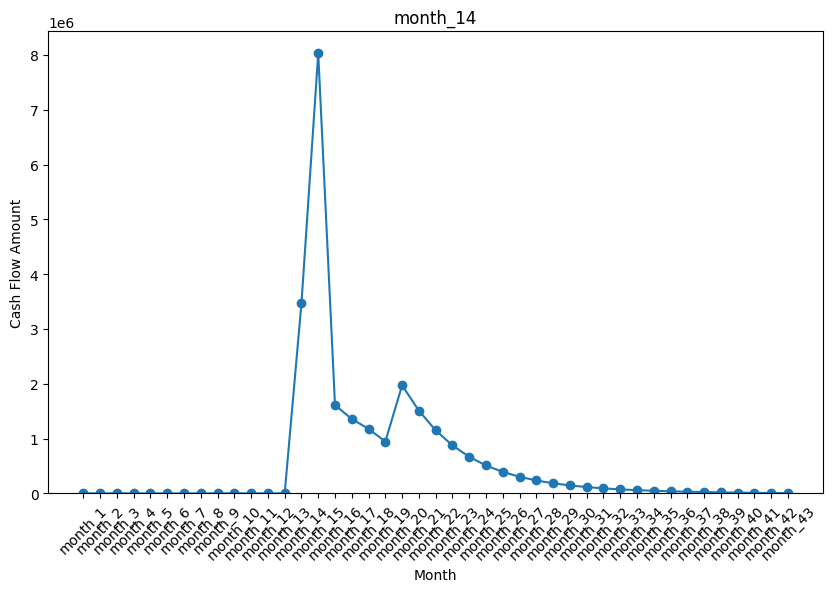

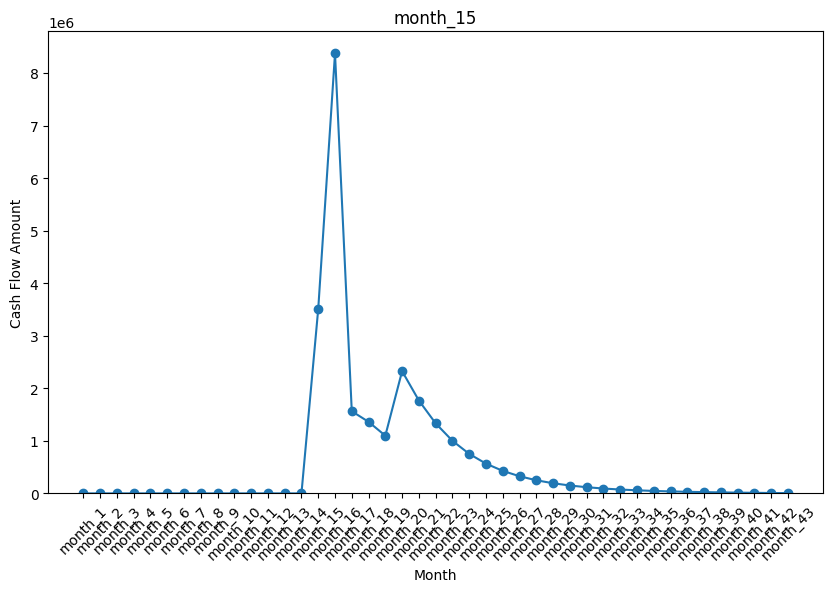

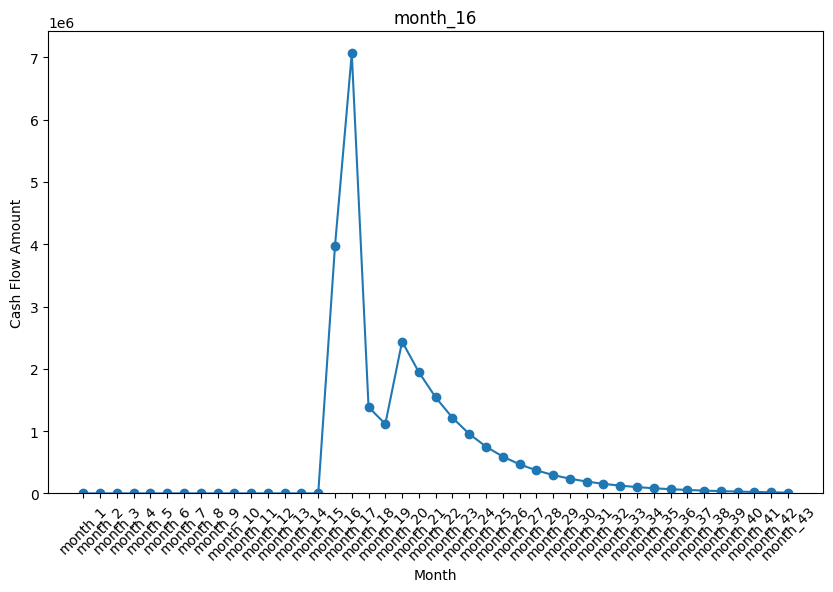

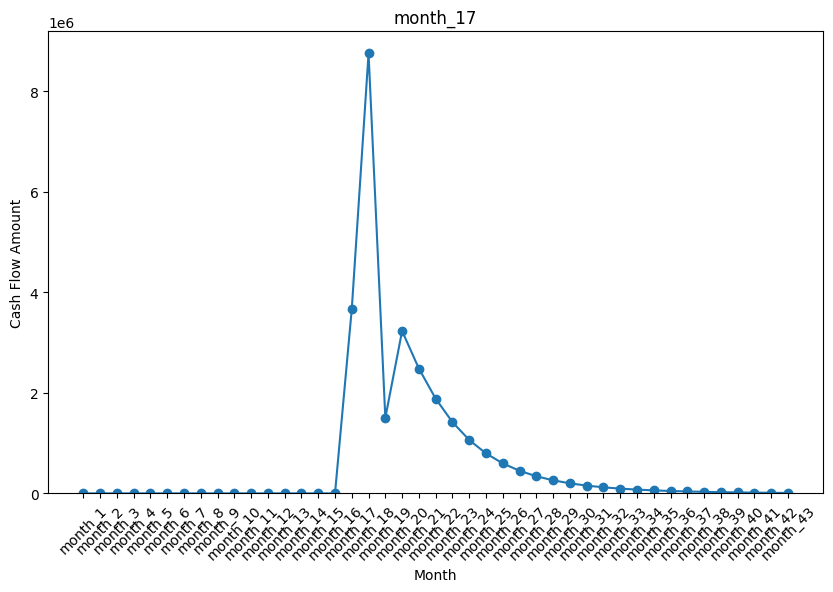

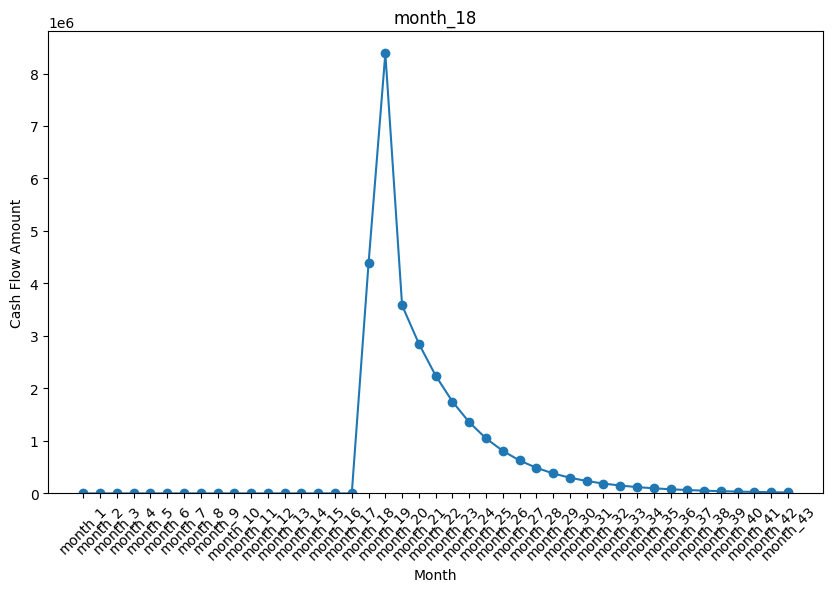

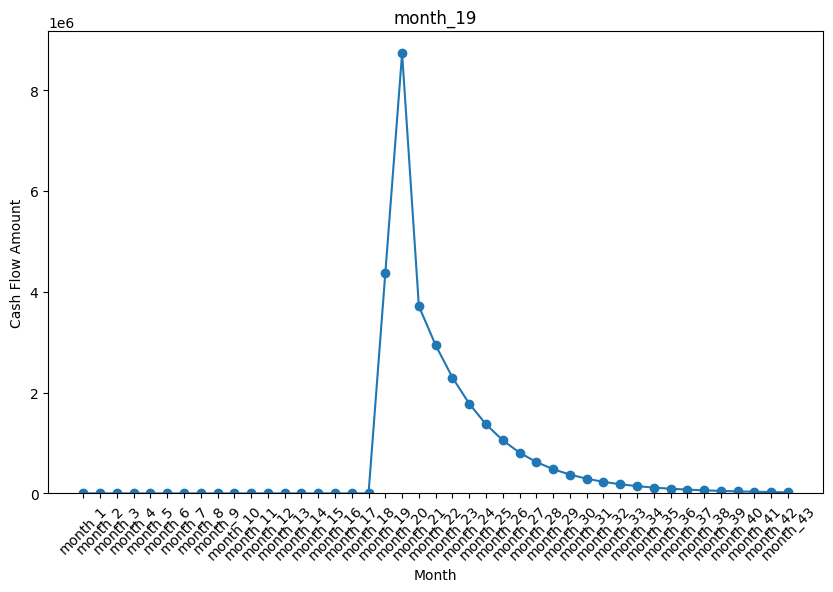

In [330]:
import matplotlib.pyplot as plt
import pandas as pd

repayment_columns = [col for col in present_value.columns if 'month_' in col]

for index, row in present_value.iterrows():
    cash_flows = row[repayment_columns]
    
    # Create a plot for the current row
    plt.figure(figsize=(10, 6))
    plt.plot(cash_flows, marker='o')
    plt.title(f'{index}')
    plt.ylim(0)
    plt.xlabel('Month')
    plt.ylabel('Cash Flow Amount')
    
    # Optionally, customize the x-axis labels
    plt.xticks(range(len(repayment_columns)), labels=repayment_columns, rotation=45)
    
    # Display the plot
    plt.show()

In [331]:
present_value.to_csv("present_value.csv")

- A 33% Total cashflow increase compared to the audit teams findings